In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import os
print(os.path.abspath('.'))

/root/data/DeepPurpose


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from lifelines.utils import concordance_index
from sklearn.metrics import mean_squared_error

In [3]:
from DeepPurpose import oneliner
from DeepPurpose.dataset import *
from DeepPurpose import utils, models, dataset

In [4]:
model2 = models.model_pretrained(path_dir = './model_MORGAN_CNN/')
model2

In [5]:
model2.config

{'input_dim_drug': 1024,
 'input_dim_protein': 8420,
 'hidden_dim_drug': 256,
 'hidden_dim_protein': 256,
 'cls_hidden_dims': [1024, 1024, 512],
 'batch_size': 512,
 'train_epoch': 50,
 'test_every_X_epoch': 10,
 'LR': 0.001,
 'drug_encoding': 'Morgan',
 'target_encoding': 'CNN',
 'result_folder': './result/',
 'binary': False,
 'num_workers': 10,
 'mlp_hidden_dims_drug': [1024, 256, 64],
 'cnn_target_filters': [32, 64, 96],
 'cnn_target_kernels': [4, 8, 12],
 'decay': 0}

In [6]:
affinity = pd.read_csv('affinity.txt', header=None, sep = '\t')
affinity = affinity.fillna(-1)

with open('target_seq.txt') as f:
    target = json.load(f)

with open('SMILES.txt') as f:
    drug = json.load(f)

target = list(target.values())
drug = list(drug.values())

SMILES = []
Target_seq = []
y = []

for i in range(len(drug)):
    for j in range(len(target)):
        if affinity.values[i, j] != -1:
            SMILES.append(drug[i])
            Target_seq.append(target[j])
            y.append(affinity.values[i, j])

Smile, Target, y = np.array(SMILES), np.array(Target_seq), np.array(y)
print('Done!')

Done!


In [ ]:
#-----performance of the model on all data(test subset)

In [7]:
X_drug = Smile.tolist()
X_target = Target.tolist() 
y = y.tolist()

drug_encoding, target_encoding = 'Morgan', 'CNN'
X = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='no_split')


in total: 118254 drug-target pairs
encoding drug...
unique drugs: 2068
drug encoding finished...
encoding protein...
unique target sequence: 229
protein encoding finished...
splitting dataset...
do not do train/test split on the data for already splitted data


In [8]:
y_pred = model2.predict(X) 
y_label = y
# print(uncer)

predicting...


In [9]:
y_pred_ = pd.DataFrame(y_pred, columns=['y_pred'])
y_pred_.to_csv('y_pred_MORGAN_CNN.csv')

In [10]:
MSE = mean_squared_error(y_label, y_pred)
CI = concordance_index(y_label, y_pred)

print(MSE)
print(CI)

0.008668368760516694
0.9816010582143287


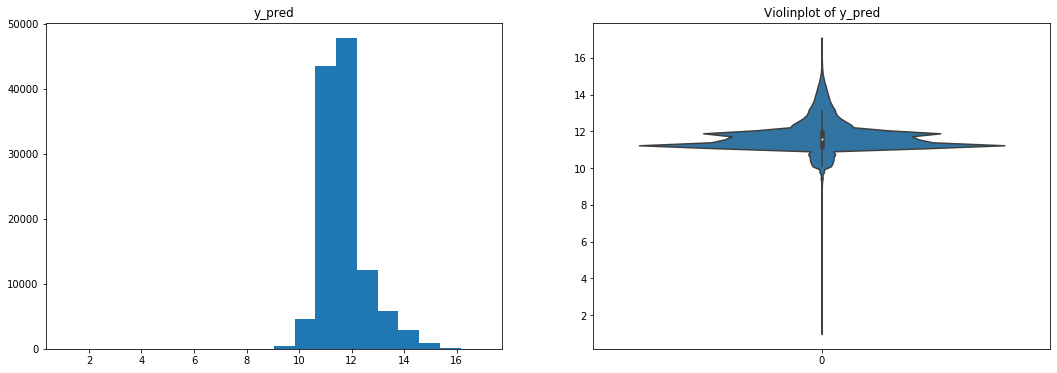

In [11]:
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot(1, 2, 1);
plt.hist(y_pred, bins=20);
plt.title('y_pred');
plt.subplot(1, 2, 2);
sns.violinplot(data=y_pred);
plt.title('Violinplot of y_pred');

In [13]:
#-----screen potential drugs for Tie2

In [14]:
X_drug = drug
X_target = ['MDSLASLVLCGVSLLLSGTVEGAMDLILINSLPLVSDAETSLTCIASGWRPHEPITIGRDFEALMNQHQDPLEVTQDVTREWAKKVVWKREKASKINGAYFCEGRVRGEAIRIRTMKMRQQASFLPATLTMTVDKGDNVNISFKKVLIKEEDAVIYKNGSFIHSVPRHEVPDILEVHLPHAQPQDAGVYSARYIGGNLFTSAFTRLIVRRCEAQKWGPECNHLCTACMNNGVCHEDTGECICPPGFMGRTCEKACELHTFGRTCKERCSGQEGCKSYVFCLPDPYGCSCATGWKGLQCNEACHPGFYGPDCKLRCSCNNGEMCDRFQGCLCSPGWQGLQCEREGIQRMTPKIVDLPDHIEVNSGKFNPICKASGWPLPTNEEMTLVKPDGTVLHPKDFNHTDHFSVAIFTIHRILPPDSGVWVCSVNTVAGMVEKPFNISVKVLPKPLNAPNVIDTGHNFAVINISSEPYFGDGPIKSKKLLYKPVNHYEAWQHIQVTNEIVTLNYLEPRTEYELCVQLVRRGEGGEGHPGPVRRFTTASIGLPPPRGLNLLPKSQTTLNLTWQPIFPSSEDDFYVEVERRSVQKSDQQNIKVPGNLTSVLLNNLHPREQYVVRARVNTKAQGEWSEDLTAWTLSDILPPQPENIKISNITHSSAVISWTILDGYSISSITIRYKVQGKNEDQHVDVKIKNATITQYQLKGLEPETAYQVDIFAENNIGSSNPAFSHELVTLPESQAPADLGGGKMLLIAILGSAGMTCLTVLLAFLIILQLKRANVQRRMAQAFQNVREEPAVQFNSGTLALNRKVKNNPDPTIYPVLDWNDIKFQDVIGEGNFGQVLKARIKKDGLRMDAAIKRMKEYASKDDHRDFAGELEVLCKLGHHPNIINLLGACEHRGYLYLAIEYAPHGNLLDFLRKSRVLETDPAFAIANSTASTLSSQQLLHFAADVARGMDYLSQKQFIHRDLAARNILVGENYVAKIADFGLSRGQEVYVKKTMGRLPVRWMAIESLNYSVYTTNSDVWSYGVLLWEIVSLGGTPYCGMTCAELYEKLPQGYRLEKPLNCDDEVYDLMRQCWREKPYERPSFAQILVSLNRMLEERKTYVNTTLYEKFTYAGIDCSAEEAA']
y = np.ones(len(drug)).tolist()

drug_encoding, target_encoding = 'Morgan', 'CNN'
X = utils.data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, 
                                split_method='no_split')


in total: 2111 drug-target pairs
encoding drug...
unique drugs: 2068
drug encoding finished...
encoding protein...
unique target sequence: 1
protein encoding finished...
splitting dataset...
do not do train/test split on the data for already splitted data


In [15]:
y_pred = model2.predict(X) 
#y_pred, uncer = model2.predict(X) 
y_label = y
#print(uncer)

predicting...


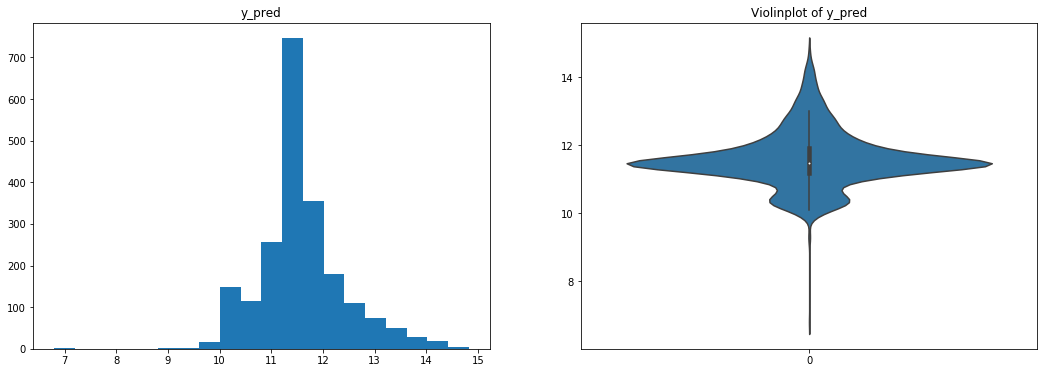

In [16]:
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot(1, 2, 1);
plt.hist(y_pred, bins=20);
plt.title('y_pred');
plt.subplot(1, 2, 2);
sns.violinplot(data=y_pred);
plt.title('Violinplot of y_pred');

In [18]:
a=pd.DataFrame(drug,columns=['drug'])
a

,drug
0,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl
1,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=CC=C3)Cl)Cl
2,C1COCCN1C2=CC(=CC=C2)NC3=NC=CC(=N3)C4=C(N=C5N4...
3,C1=CC2=C(C=C1C3=NC(=NC=C3)N)NN=C2N
4,CNC1=NC(=CN=C1)C2=CNC(=O)C(=C2)NC(=O)C3=CC=C(C...
...,...
2106,CC1CC=CC(=O)CCCC=CC2=CC(=CC(=C2C(=O)O1)O)OC
2107,CC1CC=CC(=O)CCCCCC2=CC(=CC(=C2C(=O)O1)O)OC
2108,CCN1C2=C(C=CC(=C2)OC)SC1=CC(=O)C
2109,CN1C=CC2=C1C3=C(C=C2)C4=C(C5=C(N4)C(=CC=C5)CCC...


In [19]:
b=pd.DataFrame(y_pred,columns=['y_pred'])
b

,y_pred
0,11.103197
1,11.048192
2,12.434381
3,12.242997
4,12.082492
...,...
2106,11.886885
2107,11.984346
2108,12.461342
2109,11.528559


In [20]:
c=pd.concat([a,b],axis=1)
c

,drug,y_pred
0,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,11.103197
1,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=CC=C3)Cl)Cl,11.048192
2,C1COCCN1C2=CC(=CC=C2)NC3=NC=CC(=N3)C4=C(N=C5N4...,12.434381
3,C1=CC2=C(C=C1C3=NC(=NC=C3)N)NN=C2N,12.242997
4,CNC1=NC(=CN=C1)C2=CNC(=O)C(=C2)NC(=O)C3=CC=C(C...,12.082492
...,...,...
2106,CC1CC=CC(=O)CCCC=CC2=CC(=CC(=C2C(=O)O1)O)OC,11.886885
2107,CC1CC=CC(=O)CCCCCC2=CC(=CC(=C2C(=O)O1)O)OC,11.984346
2108,CCN1C2=C(C=CC(=C2)OC)SC1=CC(=O)C,12.461342
2109,CN1C=CC2=C1C3=C(C=C2)C4=C(C5=C(N4)C(=CC=C5)CCC...,11.528559


In [21]:
d=c.sort_values(axis=0, ascending=False, by='y_pred')
d

,drug,y_pred
1364,CC1=C(C=C(C=C1)C(=O)NC2=CC(=C(C=C2)CN3CCN(CC3)...,14.825457
1035,CC1=CC(=C(C2=C1C3=CC(=CC(=C3C(=O)O2)O)OC)O)O,14.763484
1684,C1=CC=C2C(=C1)C=C(S2)C3=C(C4=CC=CC=C4N3CCCSC(=...,14.575788
694,C1CCC(C1)N2C3=C(C(=N2)C4=CC(=C(C=C4)Cl)O)C(=NC...,14.493332
1921,CC12C(C(CC(O1)N3C4=C(C=C(C=C4)O)C5=C6C(=C7C8=C...,14.479553
...,...,...
1718,COC1=CC=C(C=C1)C2=NNC3=C2C(=O)C4=CC=CC=C43,9.421010
2028,CN1C=NC2=C1N=C(N=C2NCC3=CC=CC=C3)NCCO,9.335598
1358,COC1=CC=C(C=C1)CNC2=C3C4=CC=CC=C4OC3=NC=C2,9.231235
2020,C1=CC=C(C=C1)C2=C3C4=C(C=CC(=C4)O)OC3=NC=C2O,9.183455


In [22]:
e=d[d.y_pred>=12.1]
e

,drug,y_pred
1364,CC1=C(C=C(C=C1)C(=O)NC2=CC(=C(C=C2)CN3CCN(CC3)...,14.825457
1035,CC1=CC(=C(C2=C1C3=CC(=CC(=C3C(=O)O2)O)OC)O)O,14.763484
1684,C1=CC=C2C(=C1)C=C(S2)C3=C(C4=CC=CC=C4N3CCCSC(=...,14.575788
694,C1CCC(C1)N2C3=C(C(=N2)C4=CC(=C(C=C4)Cl)O)C(=NC...,14.493332
1921,CC12C(C(CC(O1)N3C4=C(C=C(C=C4)O)C5=C6C(=C7C8=C...,14.479553
...,...,...
1991,CN1C2=C(C(=CN=C2)C3=CC=C(C=C3)NC(=O)NC4=CC(=CC...,12.109552
1692,C1CC(C(CNC1)NC(=O)C2=CC=C(C=C2)O)OC(=O)C3=CC(=...,12.108653
1811,CC1(CCC(C2=C1C=CC(=C2)C3=C(C4=CC=CC=C4N3CCCSC(...,12.107624
38,CC1CC2CN1CCN3C(=O)C4=C(N3)C(=CC=C4)C5=NC6=C(C=...,12.104974


In [23]:
e.to_csv('y_pred_TIE2_MORGAN_CNN_SORTED.csv')